In [1]:
# Import Libraries
import glob
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_results = pd.read_csv('..\\..\\output\\results\\d2\\metric.csv')

In [3]:
df_results[["OccType", "AptOrientation", \
            "RoutineType", "SPTType"]] = df_results['Unnamed: 0'].str.split('_', expand=True)

In [4]:
df_results = df_results.set_index(["OccType", "AptOrientation", "RoutineType", "SPTType"])

In [5]:
df_subresults = df_results[["rmse"]]

In [6]:
df_subresults.head()

rmse
OccType AptOrientation RoutineType SPTType              
BC      E              DR          SPT          1.386454
                                   adjustedSPT  2.020310
                                   SPTRandom    2.214603
                       FR          SPT          1.366065
                                   adjustedSPT  1.967916

In [7]:
df_wide = df_subresults.unstack()

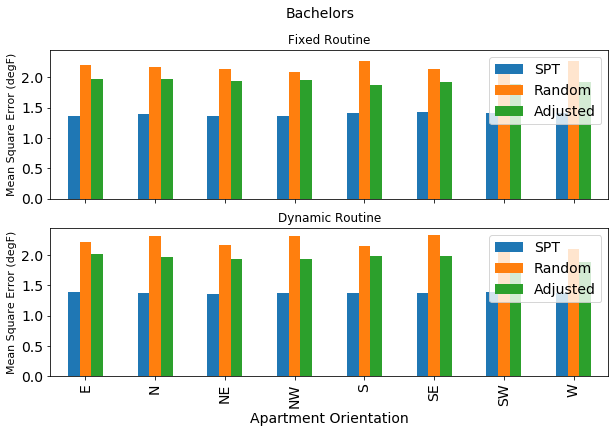

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

fig.suptitle('Bachelors', fontsize=14)

df_wide.xs(('BC', 'FR'), level=[0, 2]).plot(kind='bar', ax=ax[0], fontsize=14)
ax[0].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[0].set_xlabel('Apartment Orientation', fontsize=14)
ax[0].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[0].title.set_text('Fixed Routine')

df_wide.xs(('BC', 'DR'), level=[0, 2]).plot(kind='bar', ax=ax[1], fontsize=14)
ax[1].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[1].set_xlabel('Apartment Orientation', fontsize=14)
ax[1].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[1].title.set_text('Dynamic Routine')

plt.savefig('..\\..\\output\\results\\d2\\figures\\Bachelors_rmse.png')

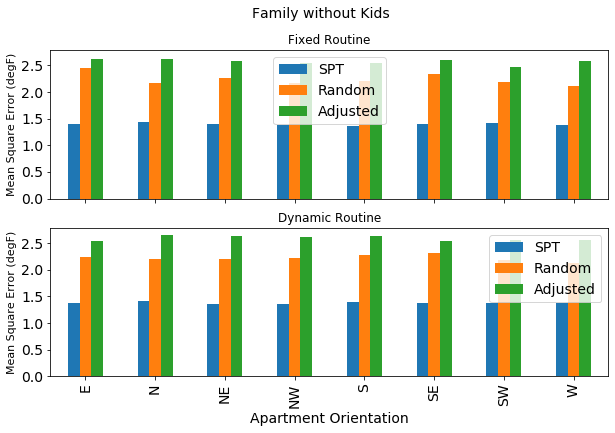

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

fig.suptitle('Family without Kids', fontsize=14)

df_wide.xs(('FwoK', 'FR'), level=[0, 2]).plot(kind='bar', ax=ax[0], fontsize=14)
ax[0].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[0].set_xlabel('Apartment Orientation', fontsize=14)
ax[0].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[0].title.set_text('Fixed Routine')

df_wide.xs(('FwoK', 'DR'), level=[0, 2]).plot(kind='bar', ax=ax[1], fontsize=14)
ax[1].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[1].set_xlabel('Apartment Orientation', fontsize=14)
ax[1].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[1].title.set_text('Dynamic Routine')

plt.savefig('..\\..\\output\\results\\d2\\figures\\FamilyWithoutKids_rmse.png')

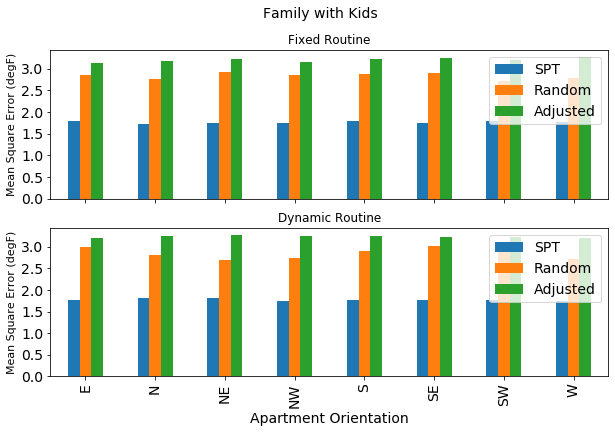

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

fig.suptitle('Family with Kids', fontsize=14)

df_wide.xs(('FwK', 'FR'), level=[0, 2]).plot(kind='bar', ax=ax[0], fontsize=14)
ax[0].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[0].set_xlabel('Apartment Orientation', fontsize=14)
ax[0].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[0].title.set_text('Fixed Routine')

df_wide.xs(('FwK', 'DR'), level=[0, 2]).plot(kind='bar', ax=ax[1], fontsize=14)
ax[1].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[1].set_xlabel('Apartment Orientation', fontsize=14)
ax[1].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[1].title.set_text('Dynamic Routine')

plt.savefig('..\\..\\output\\results\\d2\\figures\\FamilyWithKids_rmse.png')

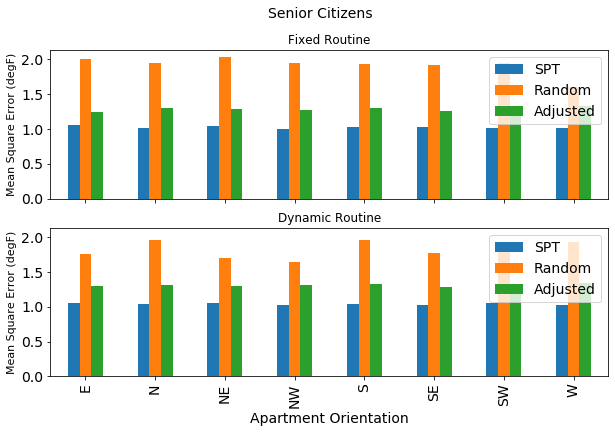

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

fig.suptitle('Senior Citizens', fontsize=14)

df_wide.xs(('SC', 'FR'), level=[0, 2]).plot(kind='bar', ax=ax[0], fontsize=14)
ax[0].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[0].set_xlabel('Apartment Orientation', fontsize=14)
ax[0].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[0].title.set_text('Fixed Routine')

df_wide.xs(('SC', 'DR'), level=[0, 2]).plot(kind='bar', ax=ax[1], fontsize=14)
ax[1].set_ylabel('Mean Square Error (degF)', fontsize=11)
ax[1].set_xlabel('Apartment Orientation', fontsize=14)
ax[1].legend(['SPT', 'Random', 'Adjusted'], fontsize=14)
ax[1].title.set_text('Dynamic Routine')

plt.savefig('..\\..\\output\\results\\d2\\figures\\SeniorCitizens_rmse.png')

In [12]:
df_sample = pd.read_csv('..\\..\\data\\processed\\framework\\d2\\apt_BC_E_FR.csv', \
                        index_col=[0], parse_dates=True, infer_datetime_format="%m/%d/%Y %H:%M:%S")['2018']

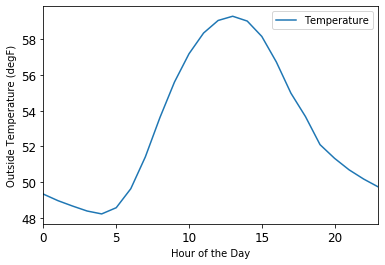

In [13]:
ax = df_sample[["Temperature"]].groupby(df_sample.index.hour).mean().plot(fontsize=12)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Outside Temperature (degF)')

plt.savefig('..\\..\\output\\results\\d2\\figures\\temperature_HoD.png')

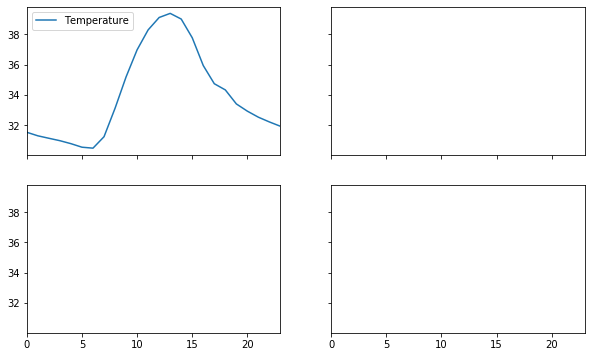

In [27]:
df_cold = df_sample[df_sample.index.month.isin([1, 2, 12])][["Temperature"]]
df_cool = df_sample[df_sample.index.month.isin([3, 11])][["Temperature"]]
df_warm = df_sample[df_sample.index.month.isin([4, 5, 10])][["Temperature"]]
df_hot = df_sample[df_sample.index.month.isin([6, 7, 8, 9])][["Temperature"]]

fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
df_cold.groupby(df_cold.index.hour).mean().plot(ax=ax[0, 0])
df_cold.groupby(df_cold.index.hour).mean().plot(ax=ax[0, 0])

In [23]:
df_sample[df_sample.index.month.isin([1, 2, 12])]

Temperature  Dew Point  Relative Humidity  Month  \
2018-01-01 00:00:00         7.16       3.38              83.79      1   
2018-01-01 00:30:00         7.16       3.38              83.87      1   
2018-01-01 01:00:00         7.16       3.38              84.29      1   
2018-01-01 01:30:00         6.98       3.38              84.98      1   
2018-01-01 02:00:00         6.80       3.38              85.46      1   
...                          ...        ...                ...    ...   
2018-12-31 21:30:00         7.70       3.20              81.30     12   
2018-12-31 22:00:00         7.52       3.02              81.75     12   
2018-12-31 22:30:00         7.52       3.02              81.75     12   
2018-12-31 23:00:00         7.34       3.20              82.62     12   
2018-12-31 23:30:00         7.34       3.20              82.62     12   

                     ActivityLevel  Clothing   SR  SPT_Mi  SPT  SPT_Ma  \
2018-01-01 00:00:00            1.3      0.78  0.0      68   71      75   
2018-01-01 00:30:00            1.3      0.78  0.0      68   71      75   
2018-01-01 01:00:00            1.3      0.78  0.0      68   71      75   
2018-01-01 01:30:00            1.3      0.78  0.0      68   71      75   
2018-01-01 02:00:00            1.3      0.78  0.0      68   71      75   
...                            ...       ...  ...     ...  ...     ...   
2018-12-31 21:30:00            1.3      0.78  0.0      68   71      75   
2018-12-31 22:00:00            1.3      0.78  0.0      68   71      75   
2018-12-31 22:30:00            1.3      0.78  0.0      68   71      75   
2018-12-31 23:00:00            1.3      0.78  0.0      68   71      75   
2018-12-31 23:30:00            1.3      0.78  0.0      68   71      75   

                     adjustedSPT  SPT_Random  Occupancy  
2018-01-01 00:00:00         75.0          74          1  
2018-01-01 00:30:00         75.0          74          1  
2018-01-01 01:00:00         75.0          71          1  
2018-01-01 01:30:00         75.0          69          1  
2018-01-01 02:00:00         75.0          74          1  
...                          ...         ...        ...  
2018-12-31 21:30:00         75.0          70          1  
2018-12-31 22:00:00         75.0          70          1  
2018-12-31 22:30:00         75.0          70          1  
2018-12-31 23:00:00         75.0          74          1  
2018-12-31 23:30:00         75.0          71          1  

[4320 rows x 13 columns]

In [ ]:
ax = df_sample[["Temperature"]].hist(grid=False)
plt.xlabel('Outside Temperature (degF)', fontsize=12)

plt.savefig('..\\..\\output\\results\\d2\\figures\\temperature_distribution.png')